In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import os
from PIL import Image
import cv2
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/Users/liu/Desktop/github/CV/image/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/liu/Desktop/github/CV/image/archive/.DS_Store
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss702.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss716.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss299.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss266.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss500.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss514.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss272.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss528.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss312.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss474.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss460.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss306.png
/Users/liu/Desktop/github/CV/image/archive/images/maksssksksss448.png
/Users/liu/Desktop/github/CV/image/ar

In [2]:
imagenames=[] #list of imagefile names
xmlnames=[] #list of xmlfile names
for dirname, _, filenames in os.walk('/Users/liu/Desktop/github/CV/image/archive'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]=="png":
            imagenames.append(filename)
        if os.path.join(dirname, filename)[-3:]=="xml":
            xmlnames.append(filename)

In [3]:
path_im="/Users/liu/Desktop/github/CV/image/archive/images/"  #path for an image folder
path_an="/Users/liu/Desktop/github/CV/image/archive/annotations/" #path for xmlfiles folder

In [4]:
import xmltodict
with open(path_an+xmlnames[0]) as f:
    print(xmltodict.parse(f.read()))

OrderedDict([('annotation', OrderedDict([('folder', 'images'), ('filename', 'maksssksksss299.png'), ('size', OrderedDict([('width', '301'), ('height', '400'), ('depth', '3')])), ('segmented', '0'), ('object', OrderedDict([('name', 'without_mask'), ('pose', 'Unspecified'), ('truncated', '0'), ('occluded', '0'), ('difficult', '0'), ('bndbox', OrderedDict([('xmin', '62'), ('ymin', '194'), ('xmax', '160'), ('ymax', '320')]))]))]))])


In [5]:
## Code for finding the total no of labels in our dataset

listing=[]
for i in imagenames[:]:
    with open(path_an+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])

for i in  set(listing):
    print(i)

mask_weared_incorrect
with_mask
without_mask


In [6]:
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} # mapping for predictions and analysis purpose

In [7]:
def draw_bounding_box(input_image): #function to visualize images
    with open(path_an+input_image[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    image=plt.imread(os.path.join(path_im+input_image))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            if temp[i]["name"]=="with_mask":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='g',facecolor="none",)
                ax.add_patch(patch)
            if temp[i]["name"]=="without_mask":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='r',facecolor="none",)
                ax.add_patch(patch)
            if temp[i]["name"]=="mask_weared_incorrect":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='y',facecolor="none",)
                ax.add_patch(patch)
    else:
        a,b,c,d=list(map(int,temp["bndbox"].values()))
        edgecolor={"with_mask":"g","without_mask":"g","mask_weared_incorrect":"y"}
        patch=patches.Rectangle((a,b),d-b,c-a,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
    ax.imshow(image)
    ax.add_patch(patch)

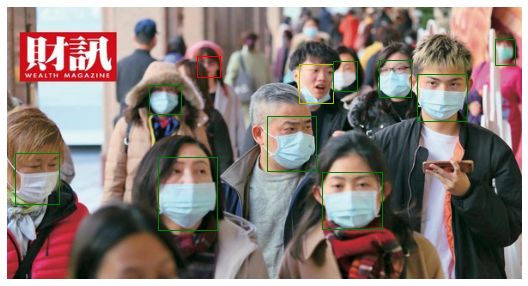

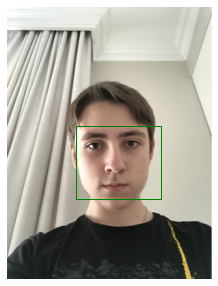

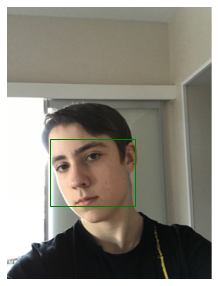

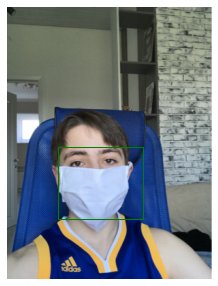

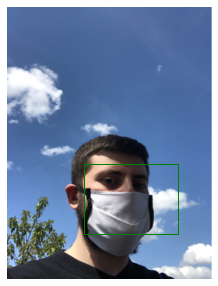

In [8]:
for i in range(0,5):
    draw_bounding_box(imagenames[i])

In [9]:
def make_dataset(no_of_images): #function to make dataset
    image_tensor=[]
    label_tensor=[]
    for i,j in enumerate(no_of_images):
        with open(path_an+j[:-4]+".xml") as fd:
            doc=xmltodict.parse(fd.read())
        if type(doc["annotation"]["object"])!=list:
            temp=doc["annotation"]["object"]
            a,b,c,d=list(map(int,temp["bndbox"].values()))
            label=options[temp["name"]]
            image=transforms.functional.crop(Image.open(path_im+j).convert("RGB"), b,a,d-b,c-a)
            image_tensor.append(my_transform(image))
            label_tensor.append(torch.tensor(label))
        else:
            temp=doc["annotation"]["object"]
            for k in range(len(temp)):
                a,b,c,d=list(map(int,temp[k]["bndbox"].values()))
                label=options[temp[k]["name"]]
                image=transforms.functional.crop(Image.open(path_im+j).convert("RGB"), b,a,d-b,c-a)
                image_tensor.append(my_transform(image))
                label_tensor.append(torch.tensor(label))

    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)

In [10]:
#importing neccessary libraries for deeplearning task..
import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader

my_transform=transforms.Compose([transforms.Resize((226,226)),
                                 transforms.ToTensor()])

dataset=make_dataset(imagenames) #making a datset
train_size=int(len(dataset)*0.8)
test_size=len(dataset)-train_size
batch_size=32
trainset,testset=torch.utils.data.random_split(dataset,[train_size,test_size])
train_loader =DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True)
test_loader =DataLoader(dataset=testset,batch_size=batch_size,shuffle=True)

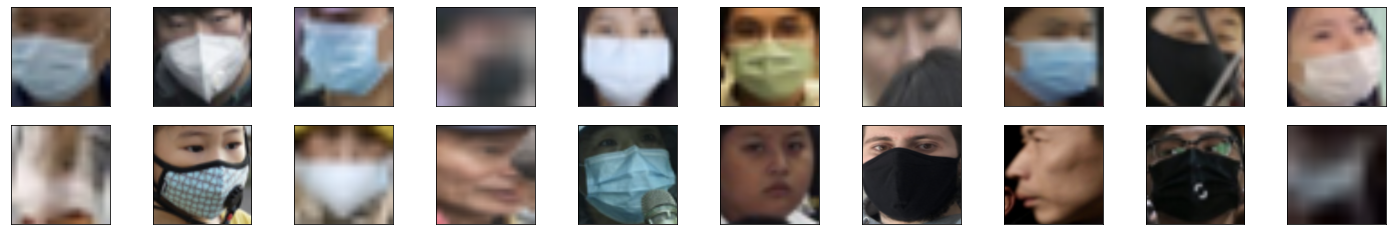

In [11]:
dataiter=iter(train_loader)
images,labels=dataiter.next()
images=images.numpy()

fig=plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=fig.add_subplot(2,int(20/2),idx+1,xticks=[],yticks=[])
    plt.imshow(np.transpose(images[idx],(1,2,0)))

In [16]:
resnet=models.resnet34(pretrained=True)

In [17]:
for param in resnet.parameters():
    param.requires_grad=False

In [18]:
import torch.nn as nn
n_inputs=resnet.fc.in_features
last_layer=nn.Linear(n_inputs,3)
resnet.fc.out_features=last_layer

if torch.cuda.is_available():
    resnet.cuda()

print(resnet.fc.out_features)

Linear(in_features=512, out_features=3, bias=True)


In [19]:
if torch.cuda.is_available(): #checking for GPU availability
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [20]:
for paramet in resnet.parameters():
    paramet.requires_grad=True

In [21]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(resnet.parameters(),lr=0.001)

In [22]:
n_epochs=1

for epoch in range(1,n_epochs+1):
    train_loss = 0.0


  ########################  TRAIN THE MODEL #################
    for batch,(data,target) in enumerate(train_loader):


        if torch.cuda.is_available():
            data , target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output=resnet(data)
        loss=criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        if batch%20==19:
            print("Epoch {}, batch {}, training loss {}".format(epoch, batch+1,train_loss/20))
        train_loss = 0.0

Epoch 1, batch 20, training loss 0.16289064884185792
Epoch 1, batch 40, training loss 0.08707303404808045
Epoch 1, batch 60, training loss 0.04540671110153198
Epoch 1, batch 80, training loss 0.05189698338508606
Epoch 1, batch 100, training loss 0.020474477112293242


# testing

In [ ]:
#########Testing##########
test_loss=0.0
acc=0
resnet.eval()

for data,target in test_loader:
    if torch.cuda.is_available():
        data,target=data.cuda(),target.cuda()
    output=resnet(data)
    loss=criterion(output,target)
    test_loss+=loss.item()
    _,pred=torch.max(output,1)
    predicted=pred.numpy()[:,np.newaxis] if not torch.cuda.is_available() else pred.cpu().numpy()[:,np.newaxis]
    actual=target.numpy()[:,np.newaxis] if not torch.cuda.is_available() else target.cpu().numpy()[:,np.newaxis]
    acc+=np.sum(predicted==actual)/len(target.cpu().numpy())

Average_loss=test_loss/len(test_loader)
Average_acc=acc/len(test_loader)

print("Avg total loss is {:.6f}".format(Average_loss))
print("Avg accuracy is {:.6f}".format(Average_acc))

In [ ]:
torch.save(resnet,open("/Users/liu/Desktop/github/CV/trained_model/resNet/resnet_model_face_mask_2","wb")) # saving the trained model.

In [ ]:
device = torch.device("cuda")
model=torch.load(open("/Users/liu/Desktop/github/CV/trained_model/resNet/resnet_model_face_mask_2","rb")) #loading the model

In [ ]:
!pip install mtcnn #installing library for predicting faces

In [ ]:
from mtcnn import MTCNN
detect=MTCNN()

In [ ]:
def trans(bndbox,newimage):
    a,b,c,d=bndbox["box"]
    image_crop=transforms.functional.crop(newimage, b,a,d-b,c-a)
    my_transform=transforms.Compose([transforms.Resize((226,226)),
                                     transforms.RandomCrop((224,224)),
                                     transforms.ToTensor()])(image_crop)
    return my_transform

In [ ]:
def tag_plot(bndbox,filepath,predicted):
    configut=["with_mask","without_mask","mask_weared_incorrect"]
    x=plt.imread(filepath)
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(15,10)
    for i,j in zip(bndbox,predicted):
        a,b,c,d=i["box"]
        patch=patches.Rectangle((a,b),c,d,linewidth=1, edgecolor='r',facecolor="none",)
        ax.imshow(x)
        ax.text(a, b, configut[predicted[0]], size=10,
                style='italic',verticalalignment="bottom", horizontalalignment="left",color="blue")
        ax.add_patch(patch)

In [ ]:
model=model.eval()
def testing(filepath):
    configut=["with_mask","without_mask","mask_weared_incorrect"]
    img = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    newimage=Image.open(filepath).convert("RGB")
    bndbox=detect.detect_faces(img)
    if len(bndbox)==1:
        image_pred=trans(bndbox[0],newimage).unsqueeze(0)
        _, pred=torch.max(model(image_pred.to(device)),1)
        tag_plot(bndbox,filepath,predicted=pred)
    else:
        predicted=[]
        for i in bndbox:
            image_pred=trans(i,newimage).unsqueeze(0)
            _, pred=torch.max(model(image_pred.to(device)),1)
            predicted.append(pred)
        tag_plot(bndbox,filepath,predicted)

In [ ]:
testing(path_im+imagenames[118]) # if you have images you can test them using this function..